## ATP Tennis Match Prediction

##### Disclaimer: this notebook is created for academic purposes and has no affiliation with any institution

- [1. Introduction](#1.-Introduction)
- [2. Dataset Overview](#2.-Dataset-Overview)
- [3. Data Cleaning and Transformations](#3.-Data-Cleaning-and-Transformations)
    * [3.1 Missing Value](#3.1-Missing-Value)
    * [3.2 Outlier Checking](#3.2-Outlier-Checking)
- [4. Exploratory Analysis](#4.-Exploratory-Analysis)
    * [4.1 Summary Statistic and Correlation Matrix](#4.1-Summary-Statistic-and-Correlation-Matrix)
    * [4.2 Data Exploration](#4.2-Data-Exploration)
- [5. Feature Engineering](#5.-Feature-Engineering)
    * [5.1 Feature Selection](#5.1-Feature-Selection)
    * [5.2 Create Dependent Variable](#5.2-Create-Dependent-Variable)
    * [5.3 Feature Transformation](#5.3-Feature-Transformation)
    * [5.4 Multicolinearity Checking](#5.4-Multicolinearity-Checking)
- [6. Model Building](#6.-Model-Building)
    * [6.1 Data Preparation](#6.1-Data-Preparation)
    * [6.2 Model Training](#6.1-Model-Training)
        * [6.2.1 Logistic Regression](#6.2.1-Logistic-Regression)
        * [6.2.2 Decision Tree Classifier](#6.2.2-Decision-Tree-Classifier)
        * [6.2.3 K-Nearest Neighbour](#6.2.3-K-Nearest-Neighbour)
        * [6.2.4 Gaussian Naive Bayes](#6.2.4-Gaussian-Naive-Bayes)
        * [6.2.5 SGD Classifier](#6.2.5-SGD-Classifier)
        * [6.2.6 Neural Network (Multi-Layer Perceptron)](#6.2.6-Neural-Network-(Multi-Layer-Perceptron))
        * [6.2.7 Random Forest Classifier](#6.2.7-Random-Forest-Classifier)
        * [6.2.8 Ensemble Method (Gradient Boosting Classifier)](#6.2.8-Ensemble-Method-(Gradient-Boosting-Classifier))
        * [6.2.9 Ensemble Method (Voting Classifier)](#6.2.9-Ensemble-Method-(Voting-Classifier))
        * [6.2.10 Ensemble Method (XGBoost Classifier)](#6.2.6-Ensemble-Method-(XGBoost-Classifier))
    * [6.3 Model Fine-Tune and Evaluation](#6.3-Model-Fine-Tune-and-Evaluation)
        * [6.3.1 XGBoost Classifier](#6.3.1-XGBoost-Classifier)
        * [6.3.2 Voting Classifier](#6.3.2-Voting-Classifier)
        * [6.3.3 Random Forest Classifier](#6.3.3-Random-Forest-Classifier)
        * [6.3.4 Gradient Boosting Classifier](#6.3.4-Gradient-Boosting-Classifier)
        * [6.3.5 Logistic Regression](#6.3.5-Logistic-Regression)
    * [6.4 Summary](#6.4-Summary)
- [7. Model Performance Test Set (Unseen Data)](#6.-Model-Performance-Test-Set-(Unseen-Data))
- [8. Feature Importance](#8.-Feature-Importance)
- [9. Conclusions](#9.-Conclusions)
- [10. Limitations and Future Work Suggestions](#10.-Limitations-and-Future-Work-Suggestions)
- [11. Reference List](#11.-Reference-List)

In [82]:
# Installation
# !pip install xlrd
# pip install xgboost
# pip install shap

# General imports
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime

# Package for DataFrame
import pandas as pd

# Package for basic math
import numpy as np
import math, statistics
import random

# Package for data visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Package for feature transformation
from sklearn.preprocessing import OneHotEncoder

# Package for splitting dataset
from sklearn.model_selection import StratifiedShuffleSplit

# Package for cross-validation
from sklearn.model_selection import cross_validate

# Package for baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

# Package for ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Package for metric performace
from sklearn import metrics
from sklearn.metrics import classification_report,mean_squared_error 
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import precision_recall_fscore_support as score

# Package for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Package for feature importance
import shap

In [ ]:
# Define function for calculating running time
# Source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# 1. Introduction

Tennis is undoubtedly one of the most popular sports in the world. People are longing for prestigious tournaments each year; one of them is around the corner; it's the French Open this May 2022. The popularity of tennis moves along with a chance for people to profit through the sports betting market. Tennis is even quoted as one of the most profitable sports for betting (Knupple, 2020) due to the significant monetary amounts involved. People have always been fascinated by the ability to forecast the outcomes of the matches. This fascination, combined with the growth of sophisticated predictive analytics tools, makes predicting tennis match outcomes more appealing in recent years.

This notebook is created for academic purpose. The objective is to build a predictive model to predict ATP tennis match's results. The model is trained using ATP matches data between 2012 to 2021, with a total of 27,000 male's tennis matches. The model will be in the interest of sport betting enthusiasts, tennis club managers, or owners striving for a predictive model that helps them understand and formulate strategies to win the matches. 

# 2. Dataset Overview

The ATP match data is sourced from https://github.com/JeffSackmann/tennis_atp.
- The dataset captures all ATP matches from 2001 to 2021
- The dataset contains the name of winner & loser of each match, the features of the players, location, and some informations related to the match e.g. winner 1st serve won, etc.
- In this project, the dataset has already combined into one excel file
- The dataset dictionary can be found here https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt

In [3]:
# Loading dataset
df_atp=pd.read_excel('/project/atp_match_2001_2021.xlsx',index_col=None,header=0)

In [15]:
# Dataset overview
df_atp.head().T

,0,1,2,3,4
tourney_id,2002-1536,2002-1536,2002-1536,2002-1536,2002-1536
tourney_name,Madrid Masters,Madrid Masters,Madrid Masters,Madrid Masters,Madrid Masters
surface,Hard,Hard,Hard,Hard,Hard
draw_size,48,48,48,48,48
tourney_level,M,M,M,M,M
tourney_date,2002-10-14 00:00:00,2002-10-14 00:00:00,2002-10-14 00:00:00,2002-10-14 00:00:00,2002-10-14 00:00:00
match_num,1,2,3,4,5
winner_id,102148,103900,102701,102839,103387
winner_seed,NaN,NaN,NaN,NaN,NaN
winner_entry,Q,NaN,NaN,NaN,NaN


In [17]:
# Format adjustments
# Change columns name to lowercase
df_atp.columns=df_atp.columns.str.strip().str.lower()

# Change tournament date data type from object to datetime
df_atp['tourney_date'] = pd.to_datetime(df_atp['tourney_date'])

# 3. Data Cleaning and Transformations

## 3.1 Missing Value

In [18]:
# Identify missing value
percent_missing = df_atp.isnull().sum() * 100 / len(df_atp)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})
missing_value_data = missing_value_data.sort_values('percent_missing', ascending = False)
missing_value_data['percent_missing'] = pd.Series(["{0:.2f}%".format(val) for val in missing_value_data['percent_missing']], index = missing_value_data.index)
missing_value_data

,percent_missing
winner_entry,87.67%
loser_entry,79.62%
loser_seed,76.98%
winner_seed,57.95%
minutes,11.18%
w_2ndwon,8.97%
w_1stin,8.97%
w_svpt,8.97%
w_df,8.97%
w_ace,8.97%


Missing values will be handled as follow: 
1. Variables with a very low missing value %
    - Adjustment for these variables will be made by dropping the row where the missing values are identified.
2. Variables with a relatively high missing value %
    - 4 variables fall into this category, including winner_entry, loser_entry, loser_seed, and winner_seed.
    - winner_entry informed us about how the player entered the competition, e.g. wild card, qualifier, a lucky loser, etc. This variable is not necessary for this analysis. So, it will be removed. The same goes for loser_entry. 
    - loser_seed and winner_seed, there is no description of what this variable explains. Thus, these variables will be removed, as it is not necessary for further analysis. 

In [19]:
# Drop rows which variable has a very low missing value %
df_atp = df_atp.dropna(how = 'any', subset = ['l_df','w_1stin','w_df','w_ace','w_1stwon','w_2ndwon','w_bpsaved',
                                              'w_bpfaced','l_ace','w_svpt','l_bpfaced','l_svpt','l_1stin','l_1stwon',
                                              'l_bpsaved','l_2ndwon','l_svgms','w_svgms','winner_ht','loser_rank',
                                              'loser_rank_points','winner_rank','winner_rank_points','loser_hand',
                                              'winner_hand','loser_ht','minutes'])

In [20]:
# Drop variables with a relatively high missing value %
df_atp = df_atp.drop(['winner_entry',
                      'loser_entry',
                      'loser_seed',
                      'winner_seed'],axis = 1)

In [21]:
# Define function to change data type
def to_int(data, cols):
            data[cols] = data[cols].astype(int)
            return data

In [25]:
# Change datatype to integer 
cols_to_int=['winner_ht','winner_age','loser_ht',
             'loser_age','minutes','w_ace',
             'w_df','w_svpt','w_1stin',
             'w_1stwon','w_2ndwon',
             'w_svgms','w_bpsaved','w_bpfaced',
             'l_ace','l_df','l_svpt','l_1stin',
             'l_1stwon','l_2ndwon','l_svgms','l_bpsaved','l_bpfaced',
             'winner_rank','winner_rank_points',
             'loser_rank','loser_rank_points'
            ]

df_atp = to_int(df_atp,cols_to_int)

## 3.2 Outlier Checking

<Figure size 1800x2160 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_ht'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_age'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_ht'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_age'>

<AxesSubplot:>

<AxesSubplot:xlabel='minutes'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_rank'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_rank_points'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_rank'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_rank_points'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_ace'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_df'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_svpt'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_1stin'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_1stwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_2ndwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_svgms'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_bpsaved'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_bpfaced'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_ace'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_df'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_svpt'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_1stin'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_1stwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_2ndwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_svgms'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_bpsaved'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_bpfaced'>

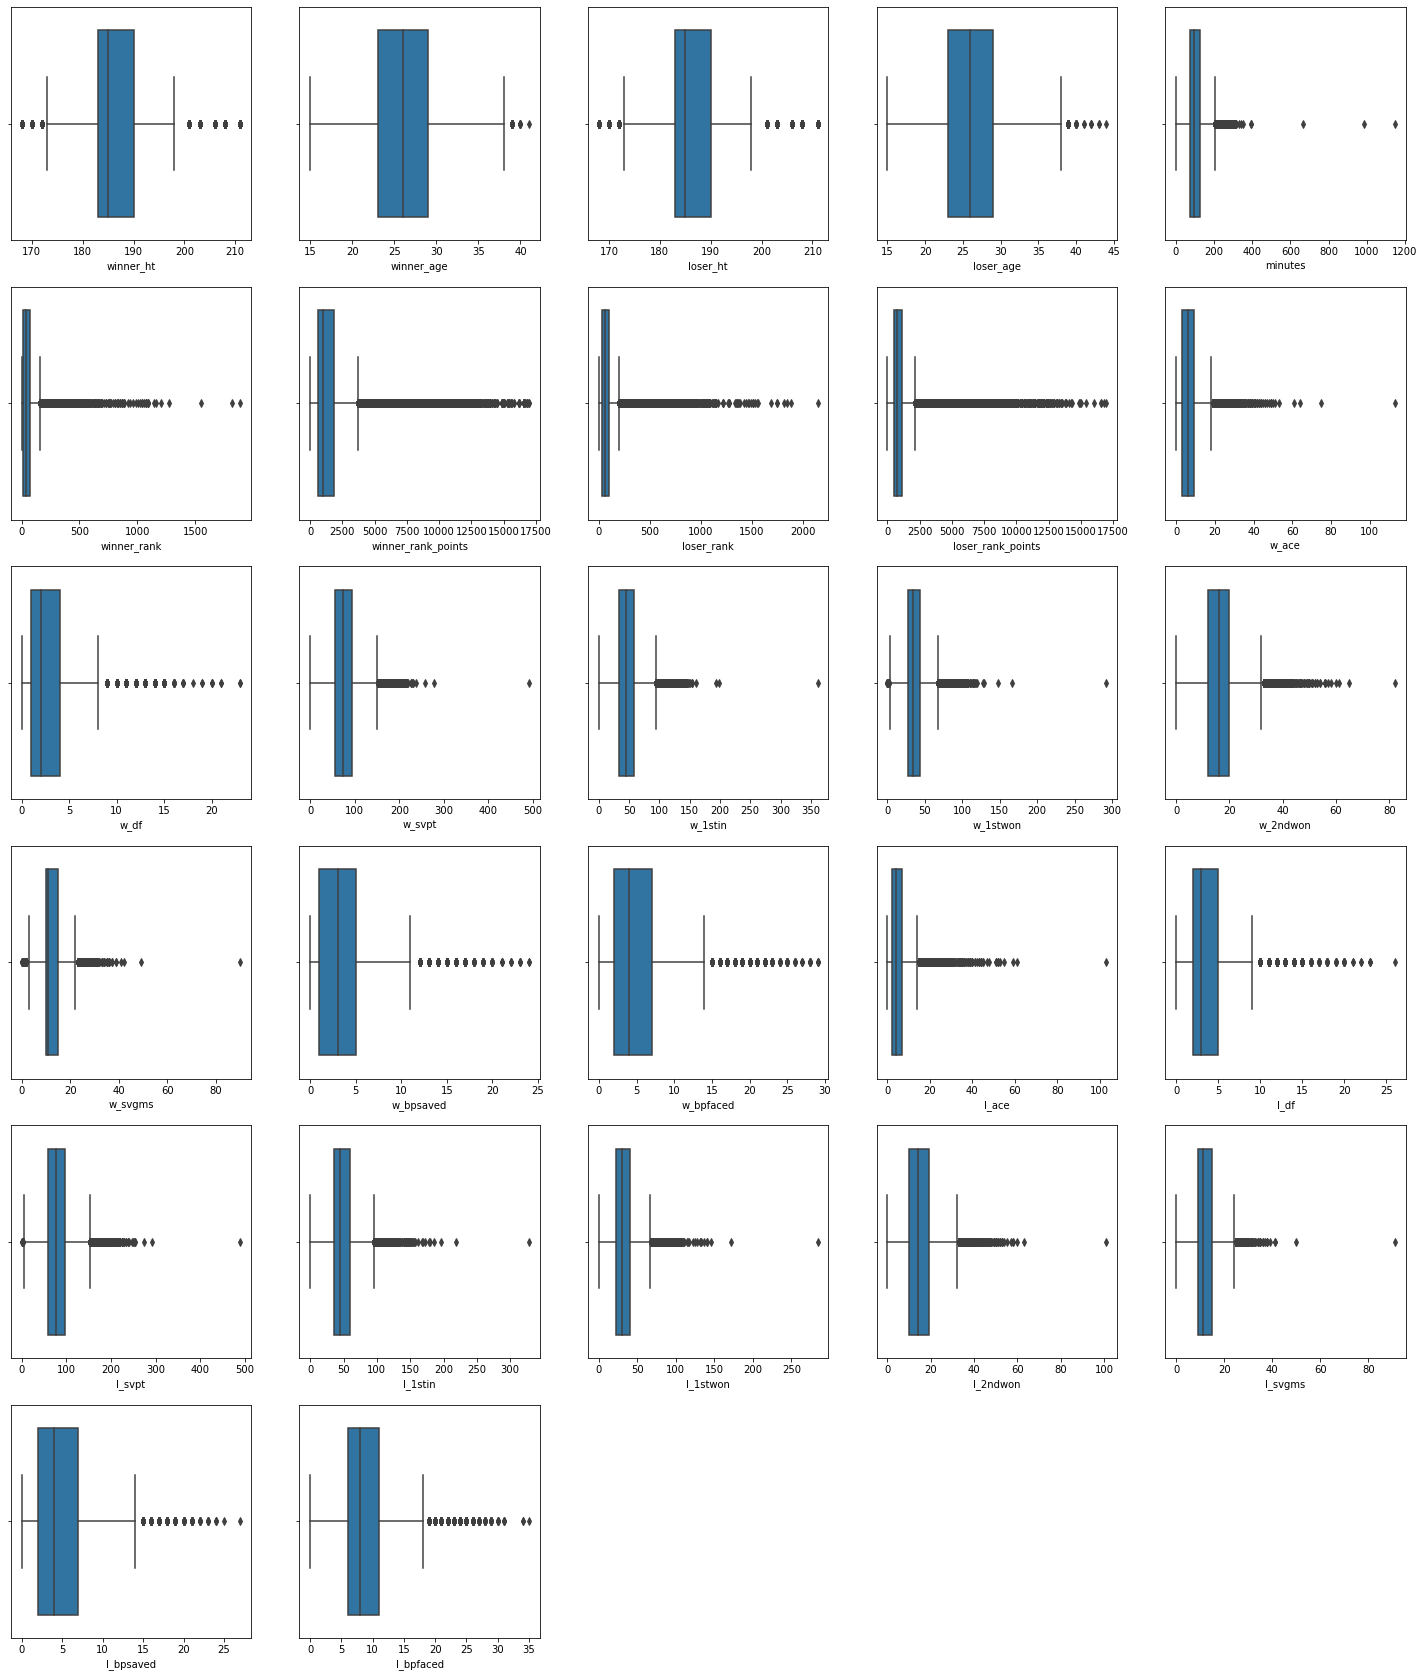

In [26]:
# Generate boxplot for outliers checking
col=['winner_ht','winner_age','loser_ht','loser_age','minutes','winner_rank','winner_rank_points',
     'loser_rank','loser_rank_points','w_ace','w_df','w_svpt','w_1stin','w_1stwon','w_2ndwon',
     'w_svgms','w_bpsaved','w_bpfaced','l_ace','l_df','l_svpt','l_1stin','l_1stwon','l_2ndwon',
     'l_svgms','l_bpsaved','l_bpfaced']

plt.figure(figsize=(25,30))

for i in range(len(col)):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(df_atp[col[i]])
    
plt.show()

Below are the details on how the outliers will be handled: 
- Outliers found in winner_age & loser_age will be removed
- Outliers found in minutes will be imputed using the mean value
- Outliers found in rank's variables will be kept as is - ranking data will always have an extensive range because it shows an order. Additionally, ranks cannot be imputed by taking mean, median, or mode value. 
- Outliers found in all variables related to the game (eg. w_ace, w_df, etc.) will be imputed using the mean value

In [27]:
# Source: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

# Define function for deleting outliers
def drop_outliers(data,column):
    iqr=1.5*(np.percentile(data[column],75)-np.percentile(data[column],25))
    data.drop(data[data[column]>(iqr+np.percentile(data[column],75))].index,inplace=True)
    data.drop(data[data[column]<(np.percentile(data[column],25)-iqr)].index,inplace=True)

# Define function for imputing outliers with mean value
def impute_outliers(data,column):
    for i in data[column]:
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        iqr=q3-q1
        lower_tail=q1-1.5*iqr
        upper_tail=q3+1.5*iqr
        if i>upper_tail or i<lower_tail:
            data[column]=data[column].replace(i,np.mean(data[column]))

In [28]:
# Create copy for outlier's removal
df_out_rmv=df_atp.copy()

# Dataset size before outliers handling
df_out_rmv.shape

(49083, 45)

In [29]:
# Deleting outliers in 'age'
col_remove=['winner_age','loser_age']

for i in col_remove: 
    drop_outliers(df_out_rmv,i)

In [30]:
%%time

# Imputing outliers for the remaining columns
col_impute=['minutes','w_ace','w_df','w_svpt','w_1stin','w_1stwon','w_2ndwon',
            'w_svgms','w_bpsaved','w_bpfaced',
            'l_ace','l_df','l_svpt','l_1stin','l_1stwon','l_2ndwon',
            'l_svgms','l_bpsaved','l_bpfaced','winner_ht','loser_ht']

for i in col_impute:
     impute_outliers(df_out_rmv,i)

CPU times: user 36min 24s, sys: 230 ms, total: 36min 24s
Wall time: 36min 24s


In [31]:
# Create copy of the cleaned dataframe
df_clean=df_out_rmv.copy()

<Figure size 1800x2160 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_ht'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_age'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_ht'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_age'>

<AxesSubplot:>

<AxesSubplot:xlabel='minutes'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_rank'>

<AxesSubplot:>

<AxesSubplot:xlabel='winner_rank_points'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_rank'>

<AxesSubplot:>

<AxesSubplot:xlabel='loser_rank_points'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_ace'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_df'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_svpt'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_1stin'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_1stwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_2ndwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_svgms'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_bpsaved'>

<AxesSubplot:>

<AxesSubplot:xlabel='w_bpfaced'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_ace'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_df'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_svpt'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_1stin'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_1stwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_2ndwon'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_svgms'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_bpsaved'>

<AxesSubplot:>

<AxesSubplot:xlabel='l_bpfaced'>

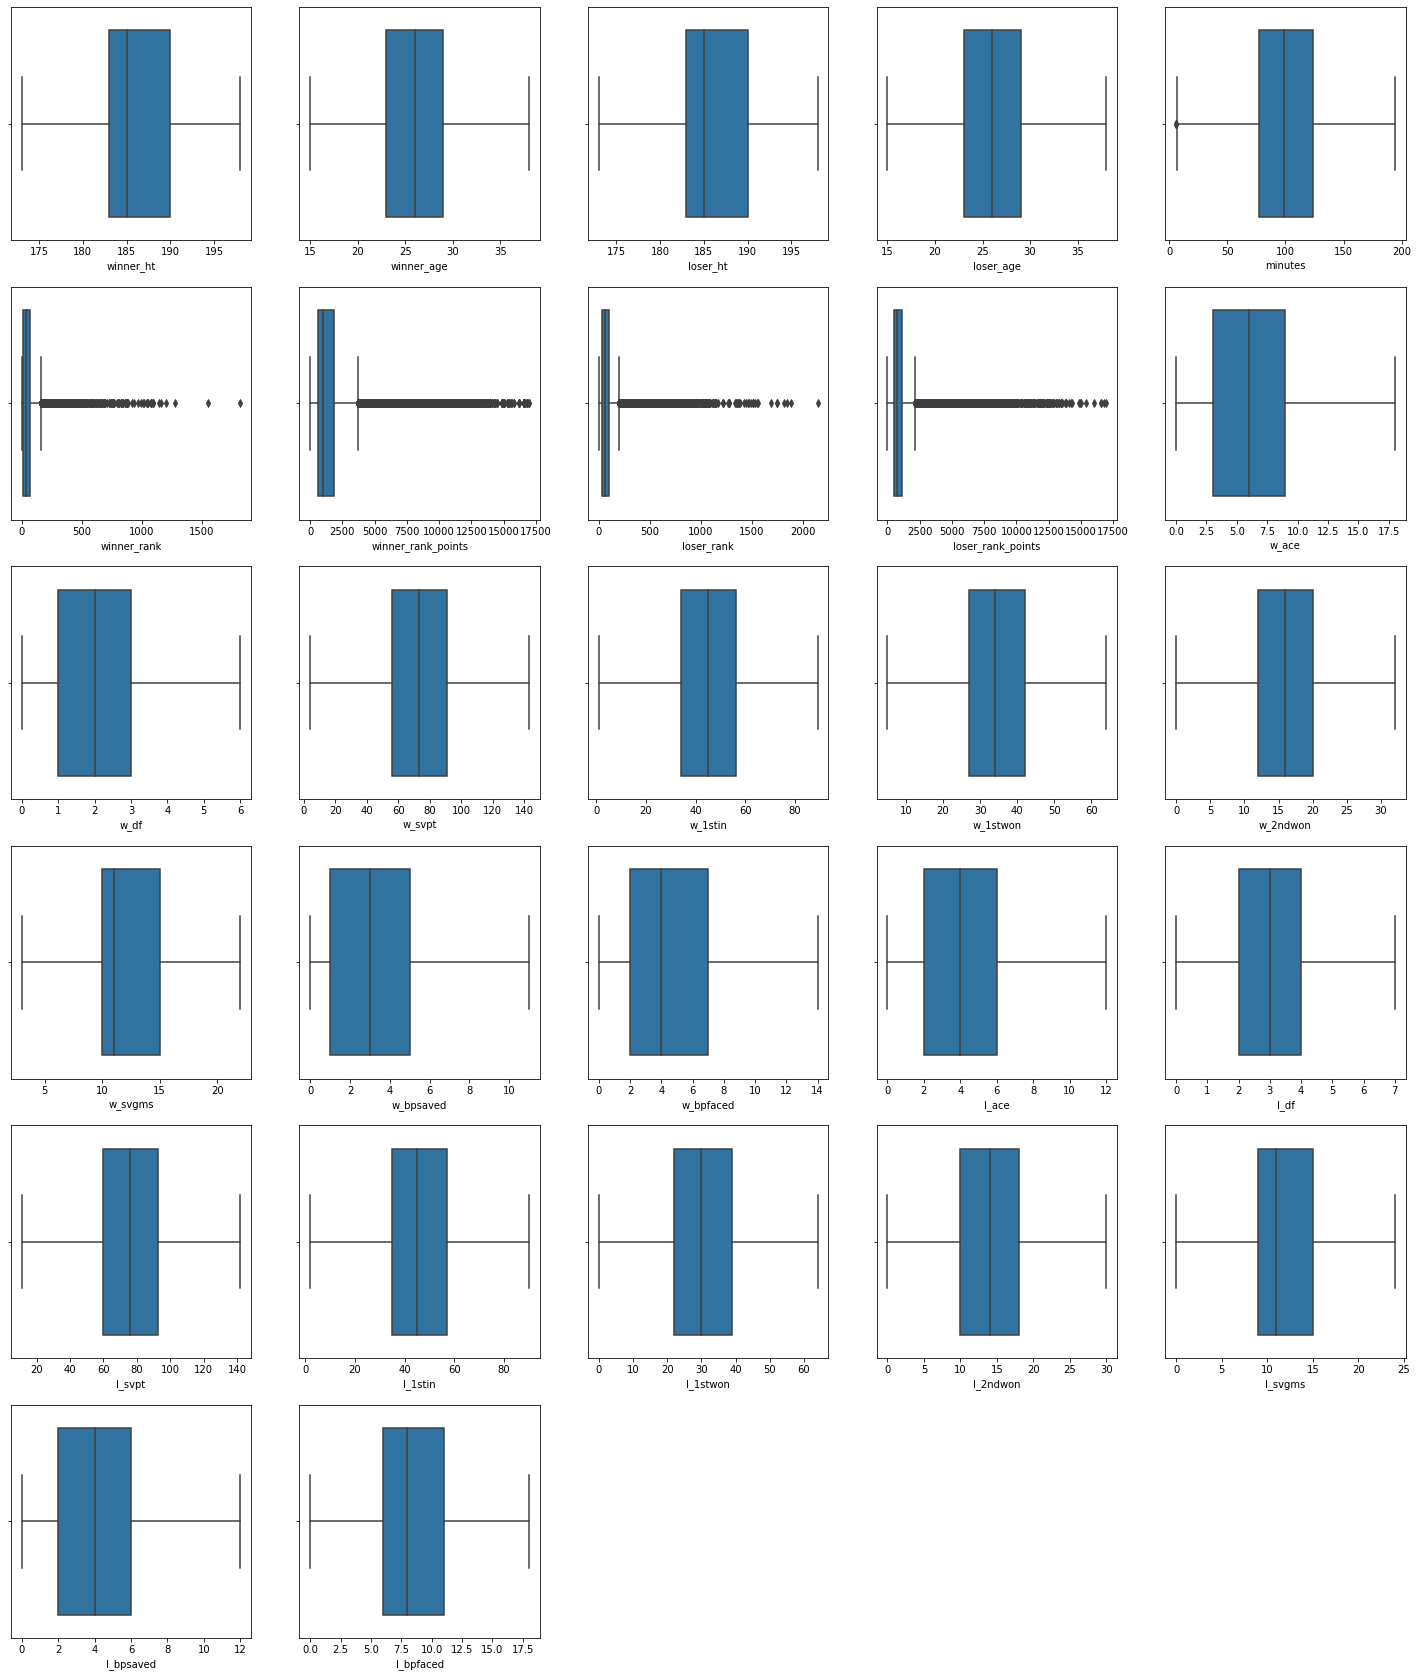

In [32]:
# Generate boxplot after outliers adjustment
col=['winner_ht','winner_age','loser_ht','loser_age','minutes','winner_rank','winner_rank_points',
     'loser_rank','loser_rank_points','w_ace','w_df','w_svpt','w_1stin','w_1stwon','w_2ndwon',
     'w_svgms','w_bpsaved','w_bpfaced','l_ace','l_df','l_svpt','l_1stin','l_1stwon','l_2ndwon',
     'l_svgms','l_bpsaved','l_bpfaced']

plt.figure(figsize=(25,30))

for i in range(len(col)):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(df_clean[col[i]])
    
plt.show()

All variables are less skewed after the outliers are adjusted except for variables related to ranks. These variables are kept as-is.

In [37]:
# Check skewness of each feature using skew() method
features_skewness= pd.DataFrame({"skew":df_clean[col].skew().sort_values(ascending=False)})
features_skewness

,skew
loser_rank,5.547817
winner_rank,5.362881
loser_rank_points,4.885005
winner_rank_points,3.115677
w_bpsaved,0.783677
w_ace,0.727089
l_svgms,0.681564
l_ace,0.667147
w_bpfaced,0.651754
l_bpsaved,0.531475


Except for rank-related variables, the skewness of all other variables are within the accpetable range (-2 and +2) (MRC CBU Wiki,2018). As mentioned earlier, rank-related variables are not adjusted because rank's range will always wide and cannot be imputed. Thus, these variables are kept as-is, no tranformation or normalization made. 

# 4. Exploratory Analysis

In the following sections, there will be some initial exploration on the dataset. The aim is to see any trends, distributions, correlations, and to identify any transformations or extra data that will be needed for further analysis.

In [38]:
# Create a copy of the data for exploration
data=df_clean.copy()

## 4.1. Summary Statistic and Correlation Matrix

In [39]:
# Summary Statistics
data.describe()

,draw_size,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,...,l_1stin,l_1stwon,l_2ndwon,l_svgms,l_bpsaved,l_bpfaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,...,48975.000000,48975.00000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000,48975.000000
mean,59.874385,91.960408,106072.955753,185.993191,26.048086,105949.451128,185.510378,26.263032,3.385421,102.199550,...,46.595968,31.08831,14.239857,12.039725,4.503535,8.299266,56.123920,1742.866769,84.169250,1041.499193
std,38.380888,129.631986,10942.259586,5.781067,3.871912,10537.619110,5.747066,3.927643,0.788863,33.190144,...,15.701195,11.99717,6.071544,3.730953,2.816149,3.635550,67.526001,2131.221411,99.916413,1164.097030
min,2.000000,1.000000,100644.000000,173.000000,15.000000,100644.000000,173.000000,15.000000,3.000000,6.000000,...,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,14.000000,103656.000000,183.000000,23.000000,103535.000000,183.000000,23.000000,3.000000,77.000000,...,35.000000,22.00000,10.000000,9.000000,2.000000,6.000000,16.000000,633.000000,34.000000,489.000000
50%,32.000000,29.000000,104312.000000,185.000000,26.000000,104269.000000,185.000000,26.000000,3.000000,99.000000,...,45.000000,30.00000,14.000000,11.000000,4.000000,8.000000,40.000000,1009.000000,62.000000,745.000000
75%,96.000000,122.000000,105023.000000,190.000000,29.000000,105062.000000,190.000000,29.000000,3.000000,124.000000,...,57.000000,39.00000,18.000000,15.000000,6.000000,11.000000,74.500000,1850.000000,99.000000,1160.000000
max,128.000000,1701.000000,210013.000000,198.000000,38.000000,210013.000000,198.000000,38.000000,5.000000,194.000000,...,90.000000,64.00000,30.000000,24.000000,12.000000,18.000000,1821.000000,16950.000000,2146.000000,16950.000000


Text(0.5, 1.0, 'Correlation Heatmap')

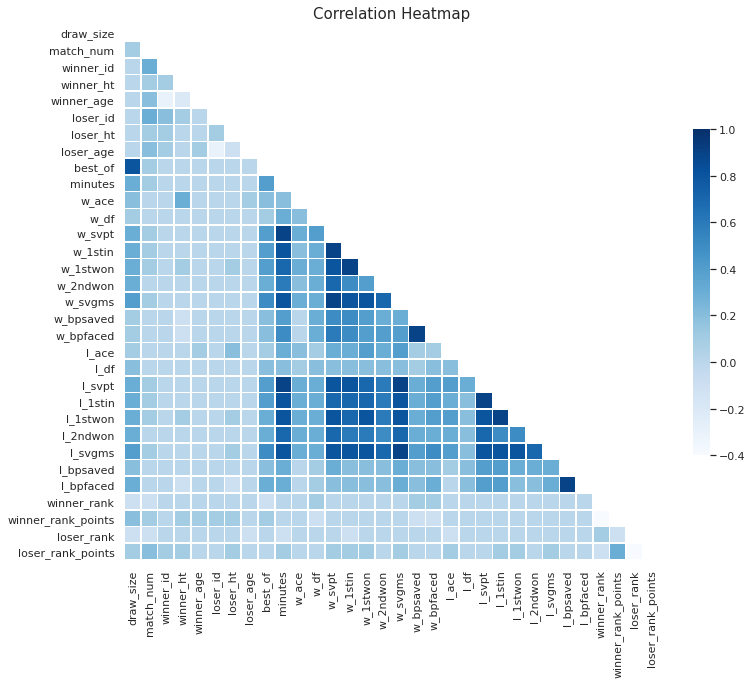

In [43]:
# Multicolinearity check using correlation heatmap
sns.set(style='white')
f, ax = plt.subplots(figsize=(12,12))

corr = round(data.corr(),1)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(30,180, as_cmap=True) 
ax = sns.heatmap(corr, mask =mask, cmap="Blues", vmax= 1, annot = False,
                 annot_kws= {'size':12}, square=True, xticklabels=True, yticklabels=True,
                 linewidths=.6, linecolor='w', cbar_kws={'shrink': 0.5}, ax=ax)

ax.set_title('Correlation Heatmap', fontsize=15)

At this initial stage, the correlation matrix above does not tell anything. There is no output variables yet that will describe whether a player wins or not. Thus, later in feature engineering section, the dataset will be reshaped by adding the target variable and correlation matrix will be regenerated afterwards.

## 4.2 Data Exploration

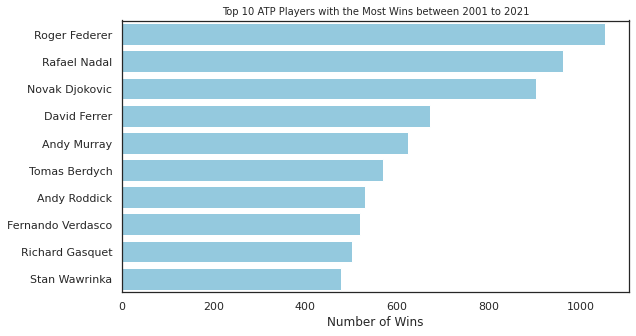

In [44]:
# Figure 1. Top 10 ATP players with the most wins
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(121)

top_wins = data.groupby("winner_name")["winner_name"].count().sort_values(ascending=False).head(10)
sns.barplot(top_wins,top_wins.index,color=("skyblue"),ax=ax1)
ax1.set_title('Top 10 ATP Players with the Most Wins between 2001 to 2021', fontsize = 10);
ax1.set_xlabel('Number of Wins');
ax1.set_ylabel('');

Roger Federer has the highest total of wins for any ATP tournaments between 2001 to 2021, followed by Nadal and Djokovic.

,player,count_win,count_lose,total_play,percentage_win
556,Roger Federer,1054,192,1246,84.59
490,Novak Djokovic,904,185,1089,83.01
527,Rafael Nadal,962,197,1159,83.00
41,Andre Agassi,185,54,239,77.41
56,Andy Murray,625,205,830,75.30


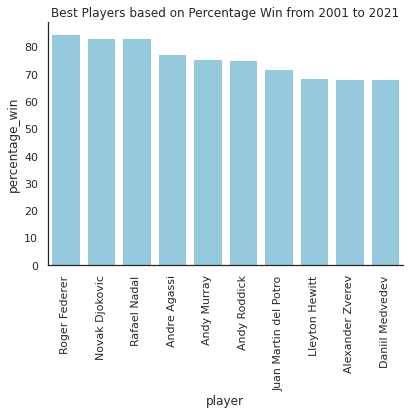

In [45]:
# Figure 2. Best Players based on Percentage Win from 2012 to 2021

# Subset necessary column from the main dataset
sub_player = data[['winner_name','loser_name','surface']]
player_w=sub_player.groupby(['winner_name']).winner_name.agg('count').to_frame('count_win').reset_index()
player_l=sub_player.groupby(['loser_name']).loser_name.agg('count').to_frame('count_lose').reset_index()
sub_player=pd.merge(player_w, player_l, how='left', left_on=['winner_name'], right_on=['loser_name'])

# Calculate percentage win
sub_player['total_play'] = sub_player['count_win'] + sub_player['count_lose']
sub_player['percentage_win'] = round(sub_player['count_win'] / sub_player['total_play'],4)*100
sub_player = sub_player.sort_values(by='percentage_win', ascending=False).head(10)
sub_player=sub_player.rename(columns={"winner_name": "player"})
sub_player = sub_player.drop(['loser_name'],axis = 1)

# Display pivot table for percentage win
sub_player.head()

# Generate bar chart
g=sns.catplot(x='player', y='percentage_win', data=sub_player, kind='bar', size=4, aspect=1.5,color='skyblue')
g.set_xticklabels(labels = sub_player['player'],  rotation=90)
title=plt.title('Best Players based on Percentage Win from 2001 to 2021')

Based on the percentage win (total wins divided by total matches), Federer still led the ladder followed by Nadal and Djokovic. Federer shows his consistency on winning the games across the years.

In [46]:
# Generate figures for Best Players based on Surface

# Create data subset
sub_surface = data[['surface','winner_name', 'loser_name']]
surface_w = sub_surface[['surface', 'winner_name']]
surface_l = sub_surface[['surface', 'loser_name']]
surface_w.columns = ['surface', 'player']
surface_l.columns = ['surface', 'player']

# Reset index
surface_w['index'] = range(1, len(surface_w) + 1)
surface_l['index'] = range(1, len(surface_l) + 1)

# Count player's total win and lose in certain surface
surface_w = surface_w.groupby(['surface', 'player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['surface', 'player', 'count_win']

surface_l = surface_l.groupby(['surface', 'player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['surface', 'player', 'count_lose']

# Create new table for percentage win for each player based on surface
sub_surface = pd.merge(surface_w, surface_l, on=['surface','player'])

sub_surface['total_play'] = sub_surface['count_win'] + sub_surface['count_lose']
sub_surface['percentage_win'] = round(sub_surface['count_win'] / sub_surface['total_play'],4)*100
sub_surface = sub_surface[sub_surface.total_play > 50]
sub_surface.sort_values(by='percentage_win', ascending=False).head(5)

,surface,player,count_win,count_lose,total_play,percentage_win
597,Clay,Rafael Nadal,436,43,479,91.02
1063,Grass,Roger Federer,160,18,178,89.89
1613,Hard,Roger Federer,675,117,792,85.23
1016,Grass,Novak Djokovic,94,17,111,84.68
1554,Hard,Novak Djokovic,577,109,686,84.11


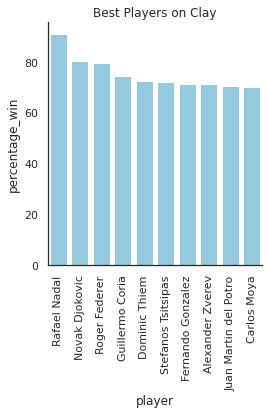

In [47]:
# Figure 3. Best Players on Clay based on Percentage Win
clay = sub_surface[sub_surface.surface == 'Clay'].sort_values(by='percentage_win', ascending = False).head(10)
g=sns.catplot(x='player',y='percentage_win',data=clay,kind='bar', size=4, aspect=1,color='skyblue')
t=g.set_xticklabels(labels = clay.player,rotation=90)
title=plt.title('Best Players on Clay')

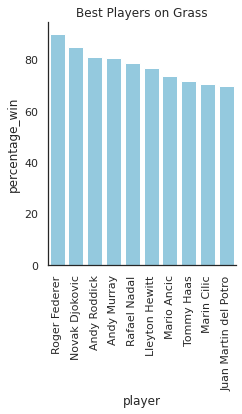

In [48]:
# Figure 4. Best Players on Grass based on Percentage Win
grass = sub_surface[sub_surface.surface == 'Grass'].sort_values(by='percentage_win', ascending = False).head(10)
g=sns.catplot(x='player',y='percentage_win',data=grass,kind='bar', size=4, aspect=1,color='skyblue')
t=g.set_xticklabels(labels = grass.player,rotation=90)
title=plt.title('Best Players on Grass')

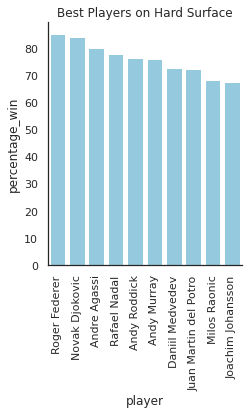

In [49]:
# Figure 5. Best Players on Hard Surface based on Percentage Win
hard = sub_surface[sub_surface.surface == 'Hard'].sort_values(by='percentage_win', ascending = False).head(10)
g=sns.catplot(x='player',y='percentage_win',data=hard,kind='bar', size=4, aspect=1,color='skyblue')
t=g.set_xticklabels(labels = hard.player,rotation=90)
title=plt.title('Best Players on Hard Surface')

Federer has the highest percentage wins on Grass and Nadal for Clay. This aligns with what Federer told to newsncr.com that grass has always been his favorite court. Similar to Nadal that even nicknamed as the 'King of Clay' cited from bbc.co.uk.

Among all the tournaments, Grand Slams is the most prestigious tennis tournament. In the following section, the data exploration will be specified to grand slams matches.

<Figure size 576x360 with 0 Axes>

[Text(0, 0, 'Roger Federer'),
 Text(1, 0, 'Rafael Nadal'),
 Text(2, 0, 'Novak Djokovic'),
 Text(3, 0, 'Andy Murray'),
 Text(4, 0, 'Stan Wawrinka'),
 Text(5, 0, 'Albert Costa'),
 Text(6, 0, 'Marat Safin'),
 Text(7, 0, 'Pete Sampras'),
 Text(8, 0, 'Marin Cilic'),
 Text(9, 0, 'Lleyton Hewitt'),
 Text(10, 0, 'Andre Agassi'),
 Text(11, 0, 'Juan Martin del Potro'),
 Text(12, 0, 'Juan Carlos Ferrero'),
 Text(13, 0, 'Gaston Gaudio'),
 Text(14, 0, 'Dominic Thiem'),
 Text(15, 0, 'Daniil Medvedev'),
 Text(16, 0, 'Andy Roddick'),
 Text(17, 0, 'Thomas Johansson')]

Text(0.5, 1.0, 'Grand Slams Winner from 2001 to 2021 ')

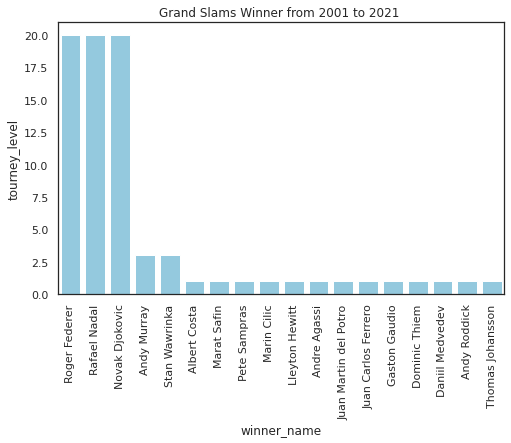

In [50]:
# Figure 6. Top Players by Total Grand Slams Won between 2001 to 2021

# Create data subset for exploration
gs = data[data['tourney_level'] == 'G']
wins = gs[['tourney_level', 'round', 'winner_name','winner_rank','tourney_name']]
wins = wins[wins['round'] == 'F']

winners = wins.groupby('winner_name')['tourney_level'].count()
winners = winners.reset_index()
winners = winners.sort_values(['tourney_level'], ascending=False)

# Create barchart
plt.figure(figsize=(8,5))

g = sns.barplot(x=winners['winner_name'], y=winners['tourney_level'],color='skyblue')
g.set_xticklabels(labels = winners['winner_name'],rotation=90)
plt.title('Grand Slams Winner from 2001 to 2021 ')
plt.show()

From the figure above, the top 3 players hold the same amount of grand slam titles between 2001 to 2021. However, the last grand slam has moved Nadal to the top of the league by winning Australian Open earlier this year (21 titles). In the next figure, we'll see the grand slam titles won by the top 10 players.

Text(0.5, 1.0, 'Total Grand Slams Won by Tournament Name from 2001 to 2021')

<Figure size 360x144 with 0 Axes>

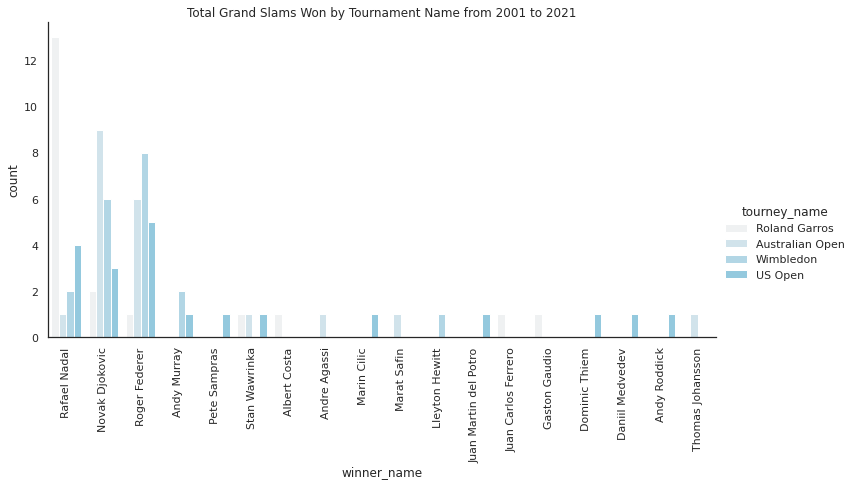

In [51]:
# Figure 7. Total Grand Slams Won by Tournament Name

# Create data subset
winners_slam=wins.groupby(['winner_name','tourney_name']).tourney_name.agg('count').to_frame('count').reset_index()
winners_slam = winners_slam.sort_values(['count'], ascending=False)

# Replace values "Us Open" to "US Open"
winners_slam["tourney_name"].replace({"Us Open": "US Open"}, inplace=True)

# Create barchart
fig = plt.figure(figsize=(5,2))

g = sns.catplot(x="winner_name", y="count", hue = "tourney_name", data=winners_slam, kind="bar", size=5, 
                aspect=2,color="skyblue")
g.set_xticklabels(labels = winners_slam['winner_name'].unique(), rotation=90)
plt.title('Total Grand Slams Won by Tournament Name from 2001 to 2021')
plt.show()

Nadal dominates Roland Garros grand slams by winning in almost all matches with more than 12 titles. Next, we'll see how's the evolution of grand slams wins for those top 3 players.

<AxesSubplot:xlabel='tourney_date', ylabel='Titles'>

<AxesSubplot:xlabel='tourney_date', ylabel='Titles'>

<AxesSubplot:xlabel='tourney_date', ylabel='Titles'>

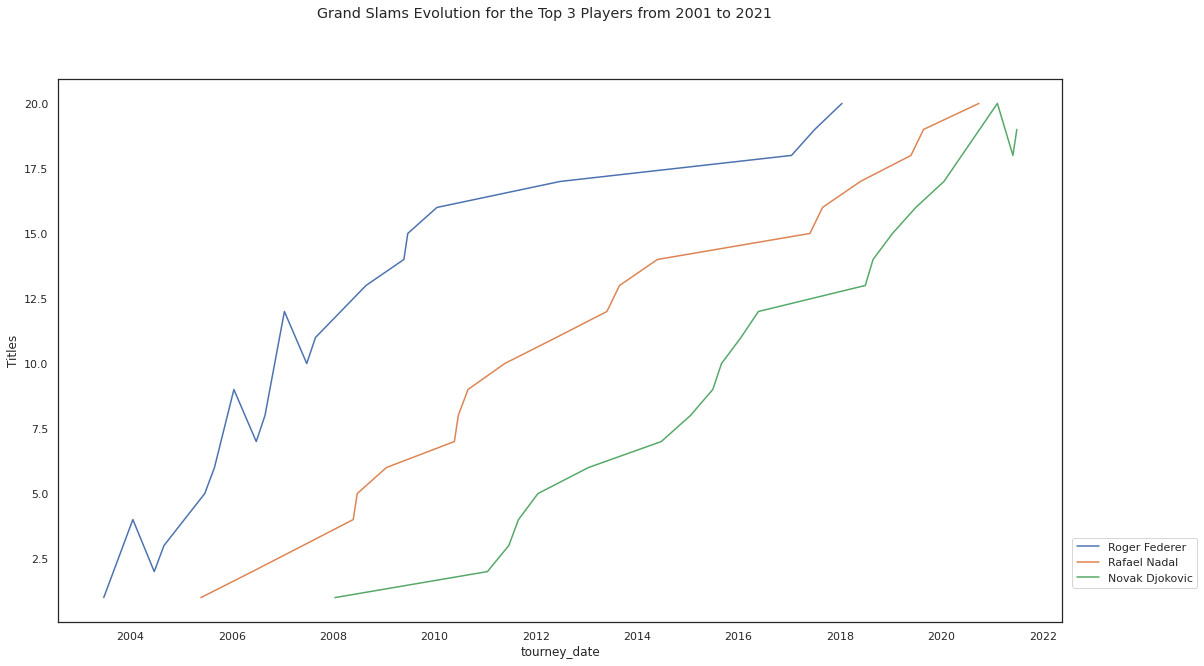

In [52]:
# Figure 8. Grandslams Evolution for the Big 3 Players

# Create subset for exploring grandslam matches
gs = data[['tourney_date','tourney_level', 'round', 'winner_name']]
gs = gs[(gs['tourney_level'] == 'G') & (gs['round'] == 'F')] # G stands for grandslam and F stands for the Final
gs = gs[gs['winner_name'].isin(['Novak Djokovic', 'Rafael Nadal', 'Roger Federer'])]

gs['Titles'] = gs.groupby('winner_name').cumcount().astype(int) + 1
gs['tourney_date'] = pd.to_datetime(gs.tourney_date, format='%d/%m/%Y')

# Create subset to plot grandslams result for top 3 players
federer_gs = gs[gs['winner_name'] == 'Roger Federer']
nadal_gs = gs[gs['winner_name'] == 'Rafael Nadal']
djokovic_gs = gs[gs['winner_name'] == 'Novak Djokovic']

# Plotting grandslams evolution for each top 3 players
fig = plt.figure(figsize=(18,10))

sns.lineplot(x='tourney_date',y='Titles',data=federer_gs)
sns.lineplot(x='tourney_date', y='Titles', data=nadal_gs)
sns.lineplot(x='tourney_date', y='Titles', data=djokovic_gs)
fig.legend(bbox_to_anchor=(-0.0010, 0.25, 1.009, 0), labels=['Roger Federer','Rafael Nadal','Novak Djokovic'])
t=fig.suptitle('Grand Slams Evolution for the Top 3 Players from 2001 to 2021')

Federer didn't win any grand slams titles after 2018. New faces showed up the past two years, making it only Nadal and Djokovic entered the grand final of the slams.

<AxesSubplot:xlabel='winner_rank', ylabel='Density'>

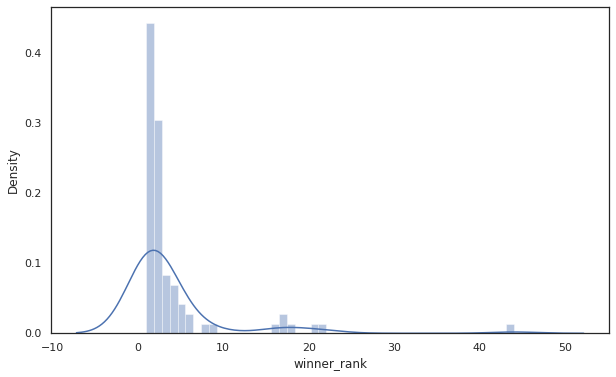

In [53]:
# Figure 9. Winner rank distribution for grand slams

# Create subset to see ranking distribution of the finalist in grand slam tournament
gs_winners = data[['tourney_level', 'round', 'winner_rank']]
gs_winners = gs_winners[(gs_winners['tourney_level'] == 'G') & (gs_winners['round'] == 'F')] # G stands for Grand Slam & F stands for Final
gs_winners['winner_rank'] = gs_winners['winner_rank'].astype(int)

# Plot distribution
fig = plt.figure(figsize=(10,6))
sns.distplot(gs_winners['winner_rank'])

The distribution shows that players who made it to the grand slams final are in the top 5 players in the worldwide rank. There is a peculiar case shown in the graph; some players who ranked between 15th to 20th and made it to grand slam finals. Knowing that most of the players who win the grand slam are those with the top 5 rankings, It will be shown below how likely someone in the top 5 is to win a grand slam.

In [54]:
# Probability top 5 winners win a Grand Slam

prob = round(gs_winners.groupby('winner_rank')['tourney_level'].count()/len(gs_winners),4)*100
top5_prob_win = round((prob[1] + prob[2] + prob[3] + prob[4] + prob[5]),4)
print("A player will have %s%% chance to win a Grand Slam if his entry rank is in the top 5" %top5_prob_win)

A player will have 86.08% chance to win a Grand Slam if his entry rank is in the top 5


# 5. Feature Engineering

There are three processes in the following sections: 
1. Features Selection
- Some variables will be removed because they are related to the match scores, which are unknown before a match start. It was kept for data exploration only. 
- Some variables that do not affect the chance of a player winning a game will be removed, e.g. winner_ioc, loser_ioc, tourney_id, tourney_name.
- Some variables that have already been described by other variables will be removed, e.g. winner_id and loser_id, defined by winner_name and loser_name. 

2. Create Dependent Variable
- Current dataset does not have a variable as the target feature.
- A new feature is created to capture a binary value with '0' if Player 1 wins and '1' if Player 2 wins. This is the feature the model will predict. 
- Below are the steps to create the feature:
    - 'win_result' will be labelled:
        - '0' if Player 1 wins
        - '1' if Player 2 wins
    - To avoid the biases of having Player 1 always be the winner, Player 1 and Player 2 will be called alphabetically, and win_result will be assigned accordingly.
    - The data will be subset according to the win_result value
    - The variables then renamed to Player 1 & Player 2, where the rule inversed between win_result 0 and 1. 
    - The two subsets will be concatenated to form one complete dataset again.
    - Class balance will be checked later to ensure roughly half of the matches, Player 1 is the winner, and the same goes with Player 2 to avoid bias.

3. Feature Transformation
- In this section, the categorical features will be encoded. 

## 5.1 Feature Selection

In [55]:
# Create a copy of the dataset for model building
df_model=data.copy()
df_model=df_model.drop(columns=['minutes','score','l_ace','l_df','l_svpt','l_1stin',
                                'l_1stwon','l_2ndwon','l_svgms','l_bpsaved','l_bpfaced',
                                'w_ace','w_df','w_svpt','w_1stin','w_1stwon','w_2ndwon',
                                'w_svgms','w_bpsaved','w_bpfaced','winner_ioc','loser_ioc',
                                'tourney_id','tourney_name','winner_id','loser_id'])

print("The remaining features are",df_model.columns)

The remaining features are Index(['surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_age', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_age', 'best_of', 'round',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


## 5.2 Dependent Variable Creation

In [56]:
# Assign value to win_result based on the alphabetical order
df_model["win_result"] = df_model.apply(lambda row: 1 if row["winner_name"] > row["loser_name"] else 0, axis=1)
df_model[["winner_name", "loser_name", "win_result"]].head(10)

,winner_name,loser_name,win_result
0,Fabrice Santoro,Julien Boutter,0
1,David Nalbandian,Francisco Clavet,0
2,Marcelo Rios,Gaston Gaudio,1
3,Nicolas Lapentti,Michel Kratochvil,1
4,Paradorn Srichaphan,Gustavo Kuerten,1
5,Ivan Ljubicic,Felix Mantilla,1
6,Tommy Robredo,Max Mirnyi,1
7,Fernando Gonzalez,Andre Sa,1
8,Xavier Malisse,Stefan Koubek,1
9,Mikhail Youzhny,Juan Ignacio Chela,1


As mentioned earlier, the dependent variable that has been created must be balance between two classes. In the following section we will check the class balance of the dependent variable.

##### Class Balance

In [57]:
# Calculate current class balance
print ('Number of Player 1 Win is: {}'.format((df_model.win_result == 0).sum()))
print ('Number of Player 1 Win is: {:.2f} %'.format((df_model.win_result == 0).sum()/len(df_model)*100))
print ('Number of Player 2 Win is: {}'.format((df_model.win_result == 1).sum()))
print ('Number of Player 2 Win is: {:.2f} %'.format((df_model.win_result == 1).sum()/len(df_model)*100))

Number of Player 1 Win is: 24048
Number of Player 1 Win is: 49.10 %
Number of Player 2 Win is: 24927
Number of Player 2 Win is: 50.90 %


The result above shows that the two class has already balanced with almost evenly divided 50:50. Thus, we can continue to the next step without any adjustments.

In [58]:
# Create subset for each win_result
df_subset_a=df_model.loc[df_model['win_result']==0]
df_subset_b=df_model.loc[df_model['win_result']==1]

In [59]:
# Rename columns for each subsets based on win_result input

# Rename subset for win_result = 0
df_subset_a=df_subset_a.rename(columns={'winner_name':'p1_name', 'winner_hand':'p1_hand', 
                                        'winner_ht':'p1_ht','winner_ioc':'p1_ioc', 'winner_age':'p1_age', 
                                        'loser_name':'p2_name', 'loser_hand':'p2_hand', 'loser_ht':'p2_ht',
                                        'loser_ioc':'p2_ioc','loser_age':'p2_age','winner_rank':'p1_rank',
                                        'winner_rank_points':'p1_rank_points', 'loser_rank':'p2_rank', 
                                        'loser_rank_points':'p2_rank_points'})

# Rename subset for win_result = 1 (inverse of df_subset_a)
df_subset_b=df_subset_b.rename(columns={'winner_name':'p2_name', 'winner_hand':'p2_hand', 'winner_ht':'p2_ht',
                                        'winner_ioc':'p2_ioc', 'winner_age':'p2_age', 'loser_name':'p1_name', 
                                        'loser_hand':'p1_hand', 'loser_ht':'p1_ht','loser_ioc':'p1_ioc',
                                        'loser_age':'p1_age','winner_rank':'p2_rank',
                                        'winner_rank_points':'p2_rank_points', 'loser_rank':'p1_rank',
                                        'loser_rank_points':'p1_rank_points'})

# Concatenate subsets
df_model=pd.concat([df_subset_a,df_subset_b])

# Reorder based on tourney_date, so it is close enough to the original ordering
df_model = df_model.sort_values(by='tourney_date', ascending=True)

# Reset indexing
df_model=df_model.reset_index(drop=True)

## 5.3 Feature Transformation
In order to build the prediction model, the categorical feature needs to be encoded using OneHotEncoder.

In [60]:
# Create function to encode categorical features using OneHotEncoder
def cat_encoding(cat_cols):
    ohe=OneHotEncoder()
    cat_encoded=ohe.fit_transform(cat_cols)
    columns=ohe.get_feature_names(list(cat_cols))
    cat_cols=pd.DataFrame(cat_encoded.todense(),columns=columns)    
    return cat_cols

In [61]:
# Define list of columns with categorical value
cat_cols=['p1_hand','best_of','p2_hand','tourney_level','surface','round',]

# Separate columns that will not be tranformed
df_not_cat=df_model.drop(columns=cat_cols)
df_cat=df_model[cat_cols]

# Encode features
df_cat_encoded=cat_encoding(df_cat)

# Concatenate original and transformed dataframe
df_final=pd.concat([df_not_cat,df_cat_encoded],axis=1)

## 5.4 Multicolinearity Checking

Text(0.5, 1.0, 'Correlation Heatmap')

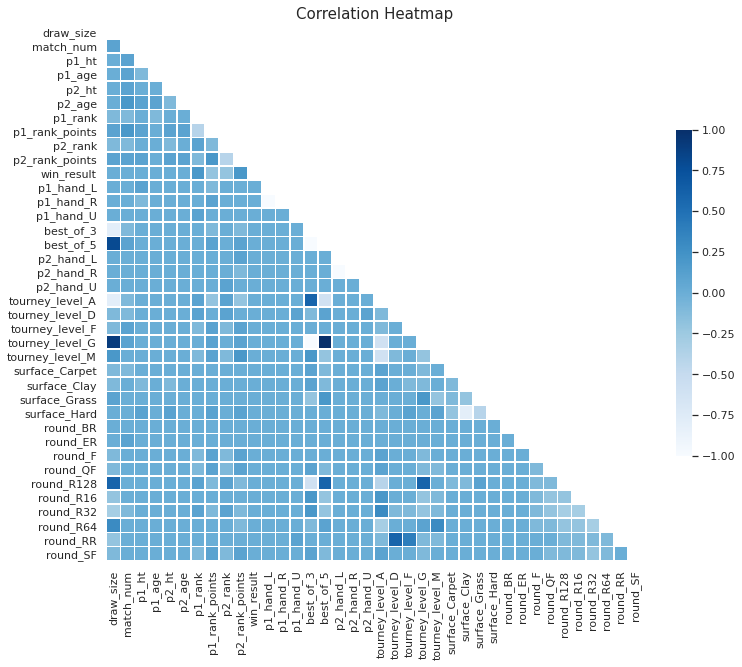

In [63]:
# Figure 10. Multicolinearity check using correlation heatmap
sns.set(style='white')
f, ax = plt.subplots(figsize=(12,12))

corr = round(df_final.corr(),1)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(30,180, as_cmap=True) 
ax = sns.heatmap(corr, mask =mask, cmap="Blues", vmax= 1, annot = False,
                 annot_kws= {'size':12}, square=True, xticklabels=True, yticklabels=True,
                 linewidths=.6, linecolor='w', cbar_kws={'shrink': 0.5}, ax=ax)
ax.set_title('Correlation Heatmap', fontsize=15)

- Most of the variables do not have strong correlation one to each other. 
- There is a relatively strong positive correlation between tourney_level_G (Grand Slam) and best_of_5. This is potentially because best_of_5 indicates the number of sets of the match which mostly happen in Grand Slam tournament. The same goes for the relationship between draw_size with tourney_level_G. 
- Draw size indicates the number of players in the draw which often times relatively higher for Grand Slams. Those variables are not the key predictors in the analysis. Thus, the analysis can be continued. 

# 6. Model Building

The goal of this analysis is to predict a match result. Thus, this analysis will use supervised classification algorithm to build the model. There are 10 models in total (7 baseline model, 3 ensemble) which are available in scikit-learn package or python library.

There are 4 main stages in this section: 
1. Data Preparation
    - The dataset will be splitted into 3 including train, validation, and test set (hold-out).
2. Model Training
    - Cross-validation will be used to fit different models into training set.
    - The result is cross-validation's scores to determine the models of choice.
3. Model Fine-Tune and Evaluation
    - Model training will use default hyperparameter value. 
    - In this section, the model will be tuned by trying several hyperparameter combinations. 
    - The tuned model will be used to predict using validation set.
    - The result will be scored using several performance metrices which is used to select the best model. 
    - The result of this stage is one best model.
4. Model Performance in Test Set (Unseen Data)
    - Fit the best model to predict using test set. 

## 6.1 Data Preparation

In this part, the dataset will be splitted into training, validation, and test set with portion of 60%, 20%, and 20%. The function that will be used is StratifiedShuffleSplit. This function is a merge of StratifiedKFold and ShuffleSplit which returns stratified randomized folds. This is used over train_test_split because the dataset is relatively not that large (scikit-learn.org, 2021).

In [64]:
# Define predictors (x) and target feature (y)
df_y=df_final['win_result'] # Define win_result as target features
df_x=df_final.drop(columns=['win_result','p1_name','p2_name','tourney_date']) # Drop target features and unecessary variables

In [65]:
# Split dataset into train, validation, and test using StratifiedShuffleSplit

# Split training + validation and test set
train_val_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=888)

for train_val_index, test_index in train_val_test_split.split(df_x, df_y):
    # Training + validation set
    x_train_val = df_x.loc[train_val_index]  
    y_train_val = pd.DataFrame(df_y.loc[train_val_index]) 
    # Test set
    x_test = df_x.loc[test_index]  
    y_test = df_y.loc[test_index]    

x_train_val = x_train_val.reset_index(drop=True)
y_train_val = y_train_val.reset_index(drop=True)

# Split training and validation set
train_val_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=888)
#train_val_split = train_val_split

for train_index, val_index in train_val_split.split(x_train_val, y_train_val):
    # Training set
    x_train = x_train_val.loc[train_index]
    y_train = y_train_val.loc[train_index]
    # Validation set
    x_val = x_train_val.loc[val_index]  
    y_val = y_train_val.loc[val_index] 
    

print("Training set: {} samples.".format(x_train.shape[0])) 
print("Val set: {} samples.".format(x_val.shape[0]))
print("Test set: {} samples.".format(x_test.shape[0]))

Training set: 29385 samples.
Val set: 9795 samples.
Test set: 9795 samples.


In [66]:
# Check class balance for training set
print ('Number of Player 1 Win is: {}'.format((y_train == 0).sum()))
print ('Number of Player 2 Win is: {}'.format((y_train == 1).sum()))

Number of Player 1 Win is: win_result    14428
dtype: int64
Number of Player 2 Win is: win_result    14957
dtype: int64


The class balance check is done for the training set. As for validation and test, there is a possibility that later the data has an unexpected mix.

## 6.2 Model Training

In this section, the chosen models will be trained on 10 fold cross validation to avoid overfitting or to ensure its generalisation. The models which has a high cross-validation score will be chosen as model of choice and will be tuned in the next hyperparameter tuning stage.

Below are the list of models used:
1.  Logistic Regression
2.  Decision Tree Classifier
3.  K-Nearest Neighbors Classifier
4.  Gaussian Naive Bayes
5.  SGD Classifier
6.  Neural Network Classifier (Multi-Layer Perceptron)
7.  Random Forest Classifier
8.  Ensemble Method (Gradient Boosting Classifier)
9.  Ensemble Method (Voting Classifier
10. Ensemble Method (XGBoost Classfier)

### 6.2.1 Logistic Regression

In [67]:
# Fit training set into the model
lr_classifier=LogisticRegression().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(lr_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.65 Std Dev: 0.01
Precision  :0.65 Std Dev: 0.01
Recall     :0.66 Std Dev: 0.01
F1         :0.66 Std Dev: 0.01


### 6.2.2 Decision Tree Classifier

In [68]:
# Fit training set into the model
dt_classifier = DecisionTreeClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(dt_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.59 Std Dev: 0.01
Precision  :0.60 Std Dev: 0.01
Recall     :0.60 Std Dev: 0.02
F1         :0.60 Std Dev: 0.01


### 6.2.3 K-Nearest Neighbour

In [69]:
# Fit training set into the model
kn_classifier = KNeighborsClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(kn_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.61 Std Dev: 0.01
Precision  :0.61 Std Dev: 0.01
Recall     :0.62 Std Dev: 0.01
F1         :0.62 Std Dev: 0.01


### 6.2.4 Gaussian Naive Bayes

In [70]:
# Fit training set into the model
gnb_classifier = GaussianNB().fit(x_train, y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(gnb_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.62 Std Dev: 0.01
Precision  :0.67 Std Dev: 0.02
Recall     :0.52 Std Dev: 0.02
F1         :0.58 Std Dev: 0.01


### 6.2.5 SGD Classifier

In [71]:
# Fit training set into the model
sgd_classifier = SGDClassifier().fit(x_train, y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(sgd_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.62 Std Dev: 0.04
Precision  :0.64 Std Dev: 0.07
Recall     :0.69 Std Dev: 0.21
F1         :0.63 Std Dev: 0.08


### 6.2.6 Neural Network (Multi-Layer Perceptron)

In [72]:
# Fit training set to the model
mlp_classifier=MLPClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(mlp_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.58 Std Dev: 0.06
Precision  :0.67 Std Dev: 0.07
Recall     :0.46 Std Dev: 0.31
F1         :0.46 Std Dev: 0.26


### 6.2.7 Random Forest Classifier

In [73]:
# Fit training set into the model
rf_classifier = RandomForestClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(rf_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.66 Std Dev: 0.01
Precision  :0.67 Std Dev: 0.01
Recall     :0.66 Std Dev: 0.01
F1         :0.66 Std Dev: 0.01


### 6.2.8 Ensemble Method (Gradient Boosting Classifier)

In [74]:
# Fit training set into the model
gb_classifier=GradientBoostingClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(gb_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.68 Std Dev: 0.01
Precision  :0.69 Std Dev: 0.01
Recall     :0.68 Std Dev: 0.01
F1         :0.68 Std Dev: 0.01


### 6.2.9 Ensemble Method (Voting Classifier)

In [75]:
# Define classifiers to be included in the voting
clf1=DecisionTreeClassifier()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()
clf4=LogisticRegression()

vt_classfier=VotingClassifier(
    estimators=[('dt', clf1), ('rf', clf2), ('kn', clf3),('lr',clf4)],
    voting='hard')

vt_classfier.fit(x_train,y_train)

scoring=['precision','recall','f1','accuracy']

for clf,label in zip([clf1, clf2, clf3,clf4,vt_classfier],['Decision Tree', 'Random Forest',
                                                      'KNeighbors','Logistic Regression','VotingClassifier']):
    
    scores = cross_validate(clf,x_train,y_train, scoring=scoring, cv=10)
    print("{} - Accuracy: {:.2f} Std Dev: {:.2f}".format(label,np.mean(scores['test_accuracy']),
                                                         np.std(scores['test_accuracy'])))
    print("{} - Precision: {:.2f} Std Dev: {:.2f}".format(label,np.mean(scores['test_precision']),
                                                          np.std(scores['test_precision'])))
    print("{} - Recall: {:.2f} Std Dev: {:.2f}".format(label,np.mean(scores['test_recall']),
                                                       np.std(scores['test_recall'])))
    print("{} - F1: {:.2f} Std Dev: {:.2f}".format(label,np.mean(scores['test_f1']),
                                                   np.std(scores['test_f1'])))

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('kn', KNeighborsClassifier()),
                             ('lr', LogisticRegression())])

Decision Tree - Accuracy: 0.59 Std Dev: 0.01
Decision Tree - Precision: 0.60 Std Dev: 0.01
Decision Tree - Recall: 0.60 Std Dev: 0.02
Decision Tree - F1: 0.60 Std Dev: 0.01
Random Forest - Accuracy: 0.66 Std Dev: 0.01
Random Forest - Precision: 0.67 Std Dev: 0.01
Random Forest - Recall: 0.66 Std Dev: 0.01
Random Forest - F1: 0.66 Std Dev: 0.01
KNeighbors - Accuracy: 0.61 Std Dev: 0.01
KNeighbors - Precision: 0.61 Std Dev: 0.01
KNeighbors - Recall: 0.62 Std Dev: 0.01
KNeighbors - F1: 0.62 Std Dev: 0.01
Logistic Regression - Accuracy: 0.65 Std Dev: 0.01
Logistic Regression - Precision: 0.65 Std Dev: 0.01
Logistic Regression - Recall: 0.66 Std Dev: 0.01
Logistic Regression - F1: 0.66 Std Dev: 0.01
VotingClassifier - Accuracy: 0.65 Std Dev: 0.01
VotingClassifier - Precision: 0.68 Std Dev: 0.01
VotingClassifier - Recall: 0.58 Std Dev: 0.01
VotingClassifier - F1: 0.63 Std Dev: 0.01


### 6.2.10 Ensemble Method (XGBoost Classifier)

In [83]:
# Fit training set into the model
xgb_classifier = XGBClassifier().fit(x_train,y_train)

# Calculate cross-validation scores
scoring=['precision','recall','f1','accuracy']
scores=cross_validate(xgb_classifier,x_train,y_train,cv=10,scoring=scoring,return_train_score=False) 

# Display cross-validation scores
print("Accuracy   :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_accuracy']),
                                                  np.std(scores['test_accuracy'])))
print("Precision  :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_precision']),
                                                  np.std(scores['test_precision'])))
print("Recall     :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_recall']),
                                                  np.std(scores['test_recall'])))
print("F1         :{:.2f} Std Dev: {:.2f}".format(np.mean(scores['test_f1']),
                                                  np.std(scores['test_f1'])))

Accuracy   :0.67 Std Dev: 0.01
Precision  :0.67 Std Dev: 0.01
Recall     :0.67 Std Dev: 0.01
F1         :0.67 Std Dev: 0.01


## 6.3 Model Fine-Tune and Evaluation

Based on the result above, 5 models which has the highest accuracy and precision/recall scores are selected. The models are:
1. XGBoost 
2. Voting Classifier
3. Random Forest Classifier
4. Logistic Regression
5. Gradient Boosting Classifier

In the following section, there will be 3 sub-tasks done, including:
1. Model hyperparameter tuning to get a better model
    - The hyperparameter combinations will be based on the model's default parameters sourced from \
    https://scikit-learn.org/stable/supervised_learning.html
    - The parameters will be slightly increased/decreased accordingly.
    - The scoring used in this hyperparameter is ROC_AUC. ROC_AUC describes well classification performance because it provides the aggreage measure of performance across all possible thresholds.  
2. Prediction on validation set using the tuned model
3. Model evaluation
    - The metric that will be the focus in this analysis are accuracy and either precision or recall. 
    - We can use either Precision/Recall because there's no cost difference between False Positive and False Negative. These 2 metrices will be weight differently if certain player costs more e.g. in a sport betting, top players may costs more
    - To simplify the case, in this analysis all players have a similar impact. Thus, if False Positive or False Negative, the lost of choosing wrong player to win the game will be the same. 

The output of this stage will be one best model to predict test set. 

In [84]:
# Define function to generate confusion matrix and ROC Curve
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

def plot_conf_matrix(classifier_name,label,predict_result):
    
    # Display performance metric; accuracy score, mean squared error, classification report, and confusion matrix
    cf_matrix=confusion_matrix(label,predict_result)
    print('Confusion Matrix',cf_matrix)

    # Plot confusion matrix
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix \n \n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    
    # Create ticket labels
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    plt.show()
    
    # Create ROC Curve graph
    fpr, tpr, thresholds= metrics.roc_curve(label,predict_result)
    auc = metrics.roc_auc_score(label,predict_result, average='macro', sample_weight=None)
    print("ROC Curve for ",classifier_name)
    sns.lineplot(fpr,tpr,color ='darkblue')
    plt.show()

### 6.3.1 XGBoost Classifier

In [86]:
%%time 

# Set combinations of hyperparameter values
# Source: https://xgboost.readthedocs.io/en/stable/parameter.html#

param = [{'learning_rate'  :[0.20,0.30],
          'max_depth'      :[5,6] # higher value leads to a more complex and a more likely overfitting model
        }]

# Random search for XGBoost Classifier
xgb_random_search = RandomizedSearchCV(xgb_classifier,param,cv=5,verbose=1,n_jobs=-1,n_iter=50,scoring='roc_auc')

# Fit random search on training set
xgb_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 5.35 s, sys: 116 ms, total: 5.47 s
Wall time: 5min 59s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256, max_cat_to_onehot=4,
                                           max_delta_step=0, max_depth=6,
                                           max

In [87]:
# The best parameters from random search
xgb_random_search.best_params_

{'max_depth': 5, 'learning_rate': 0.2}

Classifier: XGBoost Classifier
Evaluation for Prediction
Accuracy for Test Set:  0.6764675855028075
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4810
           1       0.68      0.68      0.68      4985

    accuracy                           0.68      9795
   macro avg       0.68      0.68      0.68      9795
weighted avg       0.68      0.68      0.68      9795

Confusion Matrix [[3242 1568]
 [1601 3384]]
Confusion Matrix [[3242 1568]
 [1601 3384]]


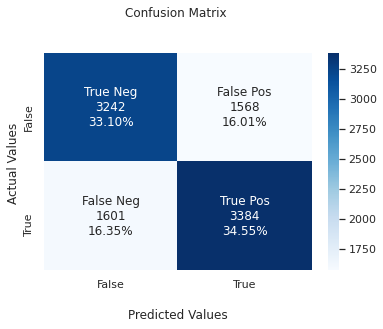

ROC Curve for  XGBoost Classifier


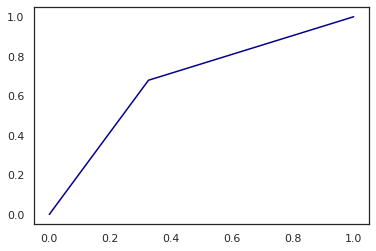

In [88]:
# Make prediction on the tuned model
xgb_pred_val_best = xgb_random_search.best_estimator_.predict(x_val)

# Evaluate the performance of the tuned model
xgb_acc_score=accuracy_score(y_val,xgb_pred_val_best)
xgb_class_report=classification_report(y_val,xgb_pred_val_best,output_dict=True)
xgb_cf_matrix=confusion_matrix(y_val,xgb_pred_val_best)
        
print("Classifier: XGBoost Classifier")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",xgb_acc_score)
print('Classification Report:')
print(classification_report(y_val,xgb_pred_val_best))

# Figure 10. XGBoost Classifier Confusion Matrix & ROC Curve
print('Confusion Matrix',xgb_cf_matrix)
plot_conf_matrix('XGBoost Classifier',y_val,xgb_pred_val_best)

### 6.3.2 Voting Classifier

In [89]:
%%time 

# Set combinations of hyperparameter values
# Param combinations based on the parameters tested on baseline models

param = {'voting'                 :['hard','soft'],
         'lr__penalty'            :['l1', 'l2'],
         'lr__solver'             :['liblinear','lbfgs'],
         'rf__n_estimators'       :[90,100,110],
         'rf__criterion'          :['gini','entropy'],
         'rf__min_samples_split'  :[2,3],
         'dt__criterion'          :['gini', 'entropy'],
         'dt__min_samples_leaf'   :[2,4],
         'dt__min_samples_split'  :[2,4],
         'dt__min_samples_leaf'   :[1,2],
         'kn__n_neighbors'        :[5,7,10],
         'kn__weights'            :['uniform','distance'],
         'kn__algorithm'          :['auto','ball_tree','kd_tree'],
         'kn__leaf_size'          :[20,30,40],
         'kn__p'                  :[1,2],
        }

# Random search for Voting Classifier model
vt_random_search = RandomizedSearchCV(vt_classfier,param,cv=5,verbose=1,n_jobs=-1,n_iter=25,scoring='roc_auc')

# Fit random search on training set
vt_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: user 6.29 s, sys: 628 ms, total: 6.92 s
Wall time: 3min 20s


RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('dt',
                                                           DecisionTreeClassifier()),
                                                          ('rf',
                                                           RandomForestClassifier()),
                                                          ('kn',
                                                           KNeighborsClassifier()),
                                                          ('lr',
                                                           LogisticRegression())]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_samples_leaf': [1, 2],
                                        'dt__min_samples_split': [2, 4],
                                        'kn__algorithm': ['auto', 'ball_tree',
                                

In [90]:
# The best parameters from random search
vt_random_search.best_params_

{'voting': 'soft',
 'rf__n_estimators': 100,
 'rf__min_samples_split': 3,
 'rf__criterion': 'gini',
 'lr__solver': 'lbfgs',
 'lr__penalty': 'l2',
 'kn__weights': 'uniform',
 'kn__p': 2,
 'kn__n_neighbors': 10,
 'kn__leaf_size': 20,
 'kn__algorithm': 'ball_tree',
 'dt__min_samples_split': 2,
 'dt__min_samples_leaf': 2,
 'dt__criterion': 'entropy'}

Classifier: Voting Classifier
Evaluation for Prediction
Accuracy for Test Set:  0.6307299642674834
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      4810
           1       0.64      0.64      0.64      4985

    accuracy                           0.63      9795
   macro avg       0.63      0.63      0.63      9795
weighted avg       0.63      0.63      0.63      9795

Confusion Matrix [[2981 1829]
 [1788 3197]]
Confusion Matrix [[2981 1829]
 [1788 3197]]


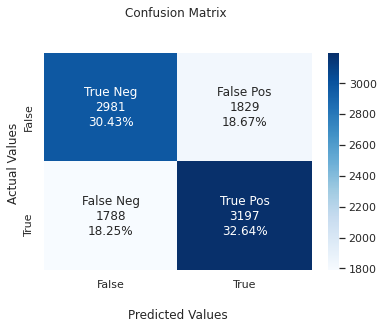

ROC Curve for  Voting Classifier


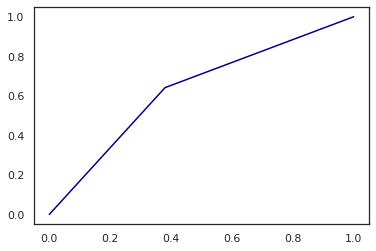

In [91]:
# Make prediction on the tuned model
vt_pred_val_best = vt_random_search.best_estimator_.predict(x_val)

# Evaluate the performance of the tuned model
vt_acc_score=accuracy_score(y_val,vt_pred_val_best)
vt_class_report=classification_report(y_val,vt_pred_val_best,output_dict=True)
vt_cf_matrix=confusion_matrix(y_val,vt_pred_val_best)
        
print("Classifier: Voting Classifier")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",vt_acc_score)
print('Classification Report:')
print(classification_report(y_val,vt_pred_val_best))

# Figure 11. Voting Classifier Confusion Matrix & ROC Curve
print('Confusion Matrix',vt_cf_matrix)
plot_conf_matrix('Voting Classifier',y_val,vt_pred_val_best)

### 6.3.3 Random Forest Classifier

In [93]:
%%time 

# Set combinations of hyperparameter values
param = [{'n_estimators'       :[90,100,110],
          'criterion'          :['gini','entropy'],
          'min_samples_split'  :[2,3]
        }]

# Random search for Random Forest Classifier
rf_random_search = RandomizedSearchCV(rf_classifier,param,cv=5,verbose=1,n_jobs=-1,n_iter=25,scoring='roc_auc')

# Fit random search on training set
rf_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 5.99 s, sys: 65.3 ms, total: 6.05 s
Wall time: 1min 13s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'min_samples_split': [2, 3],
                                         'n_estimators': [90, 100, 110]}],
                   scoring='roc_auc', verbose=1)

In [94]:
# The best parameters from random search
rf_random_search.best_params_

{'n_estimators': 100, 'min_samples_split': 3, 'criterion': 'entropy'}

Classifier: Voting Classifier
Evaluation for Prediction
Accuracy for Test Set:  0.660847371107708
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      4810
           1       0.67      0.67      0.67      4985

    accuracy                           0.66      9795
   macro avg       0.66      0.66      0.66      9795
weighted avg       0.66      0.66      0.66      9795

Confusion Matrix [[3148 1662]
 [1660 3325]]
Confusion Matrix [[3148 1662]
 [1660 3325]]


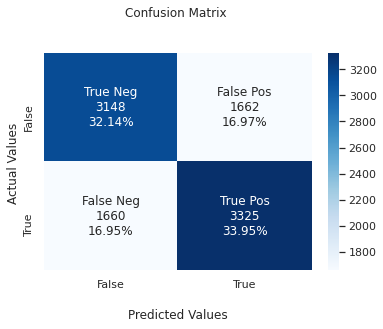

ROC Curve for  Random Forest Classifier


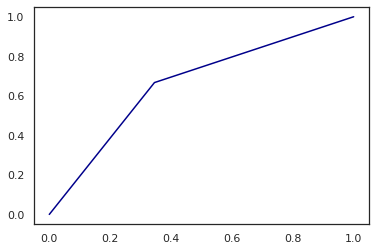

In [95]:
# Make prediction on the tuned model
rf_pred_val_best = rf_random_search.best_estimator_.predict(x_val)

# Evaluate the performance of the tuned model
rf_acc_score=accuracy_score(y_val,rf_pred_val_best)
rf_class_report=classification_report(y_val,rf_pred_val_best,output_dict=True)
rf_cf_matrix=confusion_matrix(y_val,rf_pred_val_best)
        
print("Classifier: Voting Classifier")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",rf_acc_score)
print('Classification Report:')
print(classification_report(y_val,rf_pred_val_best))

# Figure 12. Random Forest Classifier Confusion Matrix & ROC Curve
print('Confusion Matrix',rf_cf_matrix)
plot_conf_matrix('Random Forest Classifier',y_val,rf_pred_val_best)

### 6.3.4 Gradient Boosting Classifier

In [96]:
%%time 

# Set combinations of hyperparameter values
param = [{'n_estimators'     :[90,100,110],
          'learning_rate'    :[0.1,0.2],
          'loss'             :['deviance','exponential'],
         }]

# Random search for Gradient Boosting Classifier
gb_random_search = RandomizedSearchCV(gb_classifier,param,cv=5,verbose=1,n_jobs=-1,n_iter=50,scoring='roc_auc')

# Fit random search on training set
gb_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 6.02 s, sys: 48.6 ms, total: 6.07 s
Wall time: 1min 14s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.1, 0.2],
                                         'loss': ['deviance', 'exponential'],
                                         'n_estimators': [90, 100, 110]}],
                   scoring='roc_auc', verbose=1)

In [97]:
# The best parameters from random search
gb_random_search.best_params_

{'n_estimators': 110, 'loss': 'exponential', 'learning_rate': 0.1}

Classifier: Voting Classifier
Evaluation for Prediction
Accuracy for Test Set:  0.6785094435936703
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4810
           1       0.68      0.69      0.69      4985

    accuracy                           0.68      9795
   macro avg       0.68      0.68      0.68      9795
weighted avg       0.68      0.68      0.68      9795

Confusion Matrix [[3221 1589]
 [1560 3425]]
Confusion Matrix [[3221 1589]
 [1560 3425]]


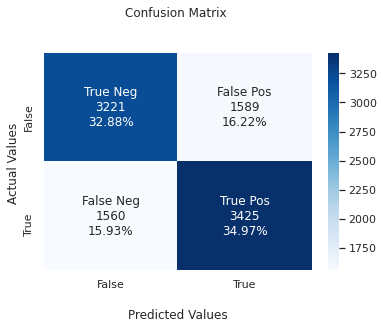

ROC Curve for  Gradient Boosting Classifier


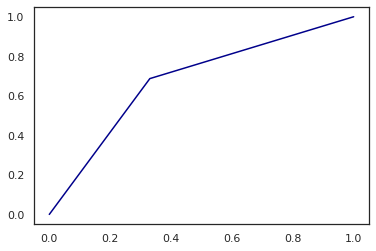

In [98]:
# Make prediction on the tuned model
gb_pred_val_best = gb_random_search.best_estimator_.predict(x_val)

# Evaluate the performance of the tuned model
gb_acc_score=accuracy_score(y_val,gb_pred_val_best)
gb_class_report=classification_report(y_val,gb_pred_val_best,output_dict=True)
gb_cf_matrix=confusion_matrix(y_val,gb_pred_val_best)
        
print("Classifier: Voting Classifier")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",gb_acc_score)
print('Classification Report:')
print(classification_report(y_val,gb_pred_val_best))

# Figure 13. Gradient Boosting Classifier Confusion Matrix & ROC Curve
print('Confusion Matrix',gb_cf_matrix)
plot_conf_matrix('Gradient Boosting Classifier',y_val,gb_pred_val_best)

### 6.3.5 Logistic Regression

In [99]:
%%time 

# Set combinations of hyperparameter values
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

param = [{'penalty'        :['l1', 'l2'],
          'solver'         :['liblinear','lbfgs'] # ‘liblinear’ is a good choice for a relatively small dataset  
         }]

# Random search for Logistic Regression
lr_random_search = RandomizedSearchCV(lr_classifier,param,cv=5,verbose=1,n_jobs=-1,n_iter=50,scoring='roc_auc')

# Fit random search on training set
lr_random_search.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 318 ms, sys: 24.4 ms, total: 343 ms
Wall time: 5.53 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions=[{'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'lbfgs']}],
                   scoring='roc_auc', verbose=1)

In [100]:
# The best parameters from random search
lr_random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2'}

Classifier: Voting Classifier
Evaluation for Prediction
Accuracy for Test Set:  0.6534966819806024
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      4810
           1       0.66      0.67      0.66      4985

    accuracy                           0.65      9795
   macro avg       0.65      0.65      0.65      9795
weighted avg       0.65      0.65      0.65      9795

Confusion Matrix [[3077 1733]
 [1661 3324]]
Confusion Matrix [[3077 1733]
 [1661 3324]]


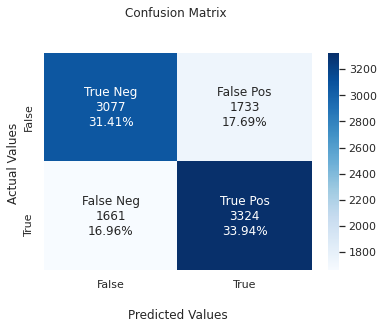

ROC Curve for  Logistic Regression


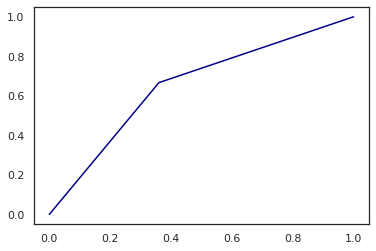

In [101]:
# Make prediction on the tuned model
lr_pred_val_best = lr_random_search.best_estimator_.predict(x_val)

# Evaluate the performance of the tuned model
lr_acc_score=accuracy_score(y_val,lr_pred_val_best)
lr_class_report=classification_report(y_val,lr_pred_val_best,output_dict=True)
lr_cf_matrix=confusion_matrix(y_val,lr_pred_val_best)
        
print("Classifier: Voting Classifier")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",lr_acc_score)
print('Classification Report:')
print(classification_report(y_val,lr_pred_val_best))

# Figure 14. Logistic Regression Confusion Matrix & ROC Curve
print('Confusion Matrix',lr_cf_matrix)
plot_conf_matrix('Logistic Regression',y_val,lr_pred_val_best)

## 6.4 Summary

Below is the summary of each model's performance metrices:

In [102]:
# Create list of the performance metric values
models=['XGBoost Classifier','Voting Classifier','Gradient Boost Classifier',
        'Random Forest Classifier','Logistic Regression']

acc_vals=[xgb_acc_score,vt_acc_score,gb_acc_score,rf_acc_score,lr_acc_score]

precision_vals=[xgb_class_report['macro avg']['precision'],vt_class_report['macro avg']['precision'],
               gb_class_report['macro avg']['precision'],rf_class_report['macro avg']['precision'],
               lr_class_report['macro avg']['precision']]

recall_vals=[xgb_class_report['macro avg']['recall'],vt_class_report['macro avg']['recall'],
            gb_class_report['macro avg']['recall'],rf_class_report['macro avg']['recall'],
            lr_class_report['macro avg']['recall']]

f1_vals=[xgb_class_report['macro avg']['f1-score'],vt_class_report['macro avg']['f1-score'],
            gb_class_report['macro avg']['f1-score'],rf_class_report['macro avg']['f1-score'],
            lr_class_report['macro avg']['f1-score']]

# Create dataframe to store performance result 
df_model_sum=pd.DataFrame({'Model':models,'Accuracy':acc_vals,'Precision':precision_vals,
                           'Recall':recall_vals,'F1':f1_vals})

# Display the result
df_model_sum.style.hide_index()

Model,Accuracy,Precision,Recall,F1
XGBoost Classifier,0.676468,0.676390,0.676424,0.676400
Voting Classifier,0.630730,0.630585,0.630537,0.630550
Gradient Boost Classifier,0.678509,0.678398,0.678354,0.678370
Random Forest Classifier,0.660847,0.660738,0.660735,0.660737
Logistic Regression,0.653497,0.653368,0.653255,0.653276


After tuning the models, we eventually have a model that performs sufficiently well. Based on the performance metrices, Gradient Boost Classifier is the best models compared to others. Next, this model will be evaluated on test set to see how it performs for 'unseen data'. 

# 7. Model Performance Test Set (Unseen Data)

GradientBoostingClassifier(loss='exponential', n_estimators=110)

Classifier: Gradient Boost Classifier on Test Set
Evaluation for Prediction
Accuracy for Test Set:  0.6864726901480347
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4810
           1       0.69      0.69      0.69      4985

    accuracy                           0.69      9795
   macro avg       0.69      0.69      0.69      9795
weighted avg       0.69      0.69      0.69      9795

Confusion Matrix [[3293 1517]
 [1554 3431]]
Confusion Matrix [[3293 1517]
 [1554 3431]]


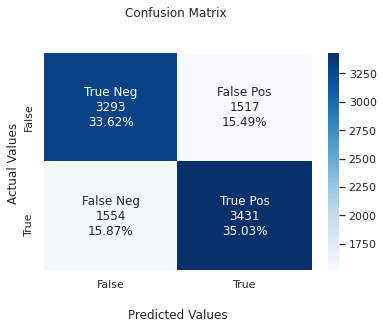

ROC Curve for  Gradient Boost Classifier Classifier


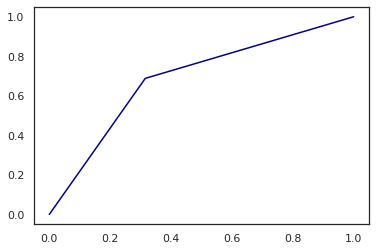

In [103]:
# Fit tuned Gradient Boost Classifier model on training + validation set
gb_random_search.best_estimator_.fit(x_train_val,y_train_val)

# Make prediction on the test set
gb_pred_test_best = gb_random_search.best_estimator_.predict(x_test)

# Evaluate the performance of the tuned model
gb_acc_score_test=accuracy_score(y_test,gb_pred_test_best)
gb_class_report_test=classification_report(y_test,gb_pred_test_best,output_dict=True)
gb_cf_matrix_test=confusion_matrix(y_test,gb_pred_test_best)
        
print("Classifier: Gradient Boost Classifier on Test Set")
print("Evaluation for Prediction")
print("Accuracy for Test Set: ",gb_acc_score_test)
print('Classification Report:')
print(classification_report(y_test,gb_pred_test_best))

# Figure 15. Gradient Boost Classifier Best Model Confusion Matrix & ROC Curve
print('Confusion Matrix',gb_cf_matrix_test)
plot_conf_matrix('Gradient Boost Classifier Classifier',y_test,gb_pred_test_best)

The prediction result on the test set above shows that the model performs quite well on the test set with a slightly higher performance than the result on the training set. This may indicate that the model can sufficiently predict the 'unseen data' even though it performs slightly better on the test set. There are several possible causes on this case: 
- The data splitting may be unreliable because of the size. A larger sample size might help solve this problem. 
- Considering confidence intervals on accuracy estimates will also help explain the case. 
- The 5-fold cross-validation may not be that precise. It is probably necessary to repeat it 100 times to achieve adequate precision. 
- There is also a possibility that the chosen scoring rule is improper, which lead to the wrong model being selected.

# 8. Feature Importance

The following section will analyze the most important features that affect the target feature using SHAP (SHapley Additive exPlanations). There are 2 visualizations: 
- force_plot : this function visualizes feature attributions where each feature is a force that increases or decreases the prediction relative to the baseline. 
- summary_plot: this plot visualizes the classifier's behaviour & the most important features. The first one that appeared is the most important feature. 

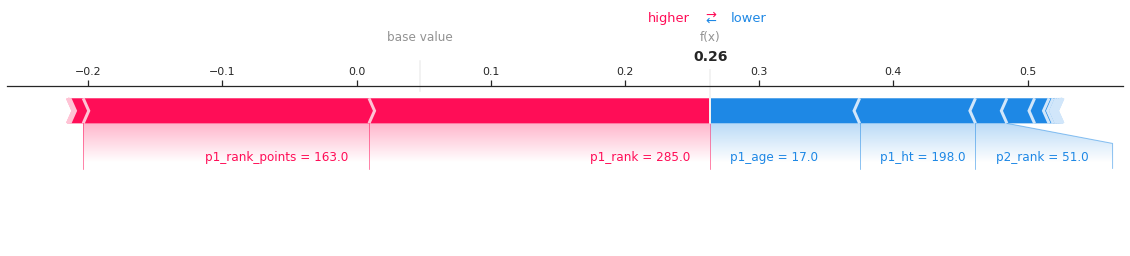

In [104]:
# Source: https://christophm.github.io/interpretable-ml-book/shap.html

# Load JS visualization
shap.initjs()
x_importance=x_test

# Explanation on the model's prediction result
explainer = shap.TreeExplainer(gb_random_search.best_estimator_)
shap_values = explainer.shap_values(x_importance)

# Figure 16. Feature Attributions Forces on the Prediction Model
shap.force_plot(explainer.expected_value, shap_values[0,:],x_importance.iloc[0,:], matplotlib=True)

The figure shows features that contribute in pushing the model output from the baseline value (the average model output from the training set) to the model output. Features highlighted in red pushes the prediction higher than those highlighted in blue. 

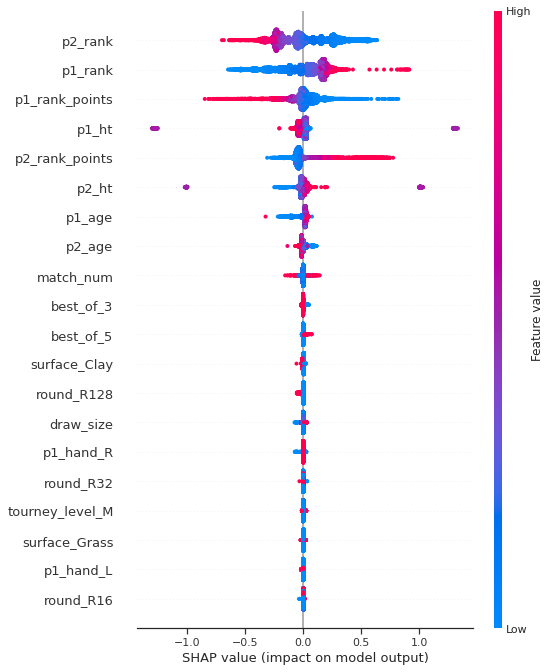

In [105]:
# Figure 17. Summary of all features effect on the target feature
shap.summary_plot(shap_values,x_importance)

The figure above shows the most important features are rank-related features. This is as expected as those features reflect the player's past performance. The blue colour above represents low value and high value for red. This can be interpreted as a high value in p1_rank (rank of the first player) lowers the predicted labels (label tends to be 0, which means p1 win). 

Along with the attribution graph, we can say that a player's recent rank before entering a tournament (p1_rank & p2_rank) highly affects who will win the match. The same goes for p1_rank_points which is the points conversion of the rank.

4       143
5       135
8       131
7       123
9       123
       ... 
635       1
643       1
715       1
779       1
1511      1
Name: p1_rank, Length: 444, dtype: int64

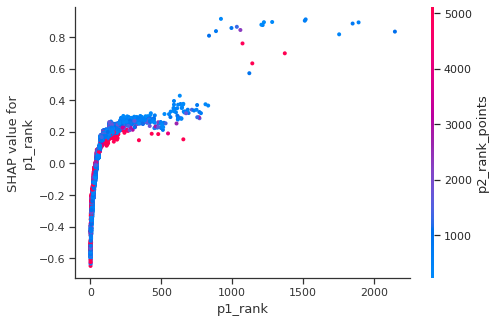

In [106]:
# Figure 17. Single feature dependence plot
x_importance.p1_rank.value_counts()
shap.dependence_plot("p1_rank", shap_values,x_importance)

A dependence plot helps visualise a single feature's influence on the model output. The plot above represents the influence of 'p1_rank'. The vertical dispersion at a single value of 'p1_rank' represents its interaction with other features. The high values of 'p1_rank' influence the model more significantly.

# 9. Conclusions

The goal of this report is to build a pre-match tennis prediction model. The model is built by using supervised classification machine learning algorithms. Several models have been assessed to find the best-suited model for this case. The performance metrics used are accuracy score, precision, and recall scores. The best model chosen is Gradient Boost Classifier. The selected model is then fitted to predict the test set or 'unseen dataset'. The prediction results show that the model performs sufficiently well on the test set with 65.4% accuracy and 65% precision & recall scores. The Player's rank plays an essential role in driving the prediction. We found that Player's ranks and Player's rank points are the most important features from importance feature analysis. 

Having the analysis going well, some limitations need to be addressed further to build a more reliable model. The following section will explain more on these limitations.

# 10. Limitations and Future Work Suggestions

There are suggestions for future work:
1. Model Fine-Tuning \
Due to computational limitation, parameter combinations in the model tuning process is not comprehensive enough to produce a better model. This can be explored further by checking the effect of each parameter and adding more combinations. 

2. Time series consideration \
The current model only uses k-fold cross-validation. However, the sport matches dataset is chronological, where we use historical data to predict future outcomes. Thus, in future work, we can consider having TimeSeriesSplit on the dataset to ensure that the test set is always after the train set chronologically. Even though it looks like we only see how the model performs in a particular year, taking into account the time series is still worth checking. 

3. Include sport betting data \
Many sports betting sides are available, e.g. Unibet, Matchbook, bet365 etc. Incorporating a dataset from the sports betting side will be beneficial to act a comparison, add more features, or leverage the analysis to see how sport betting users can get a good return of investment. 

# 11. Reference List

1. Ryan Knupple 2020,What is the Most Profitable Sport to Bet on?, viewed 4 Mar 2022, <https://usbettingreport.com/sports-betting-guides/what-is-the-most-profitable-sport-to-bet-on/>.
2. Tilii 2018, Hyperparameter Grid Search with XGBoost, viewed 25 Feb 2022,<https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost>.
3. MRC CBU Wiki,Testing normality including skewness and kurtosis, viewed 28 Feb 2022, <https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon>.
4. Editorial,Wimbledon: Why Roger Federer is the best on the grass court, will Djokovic take back his crown this year?, viewed 4 Mar 2022, <https://www.newsncr.com/sports/wimbledon-why-roger-federer-is-the-best-on-the-grass-court-will-djokovic-take-back-his-crown-this-year/>.
5. Jurejko Jonathan, French Open 2020: Why is Rafael Nadal so good on clay?, viewed 4 Mar 2022, <https://www.bbc.co.uk/sport/tennis/54499161>.
6. Ultimate Tennis Statistic, Most Grand Slam Titles, viewed 4 Mar 2022, <https://www.ultimatetennisstatistics.com/record?recordId=GrandSlamTitles>.
7. scikit-learn,sklearn.model_selection.StratifiedShuffleSplit,viewed 4 Mar 2022,<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html>
8. scikit-learn,sklearn.metrics.plot_confusion_matrix,viewed 4 Mar 2022,<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html>.
8. scikit-learn,Receiver Operating Characteristic (ROC),viewed 4 Mar 2022,<https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html>.
9. JeffSackmann,tennis_atp,viewed 20 Feb 2022,<https://github.com/JeffSackmann/tennis_atp>.
10. JeffSackmann,tennis_atp/matches_data_dictionary,viewed 20 Feb 2022,<https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt>.
11. Anuganti Suresh, How to Remove Outliers for Machine Learning?, viewed 4 Mar 2022, <https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8>.
12. scikit-learn,Cross-validation: evaluating estimator performance,viewed 4 Mar 2022,<https://scikit-learn.org/stable/modules/cross_validation.html>.
13. scikit-learn,Supervised learning,viewed 4 Mar 2022,<https://scikit-learn.org/stable/supervised_learning.html>
14. XGBoost, XGBoost Documentation,viewed 4 Mar 2022,<https://xgboost.readthedocs.io/en/stable/>
15. scikit-learn,sklearn.linear_model.LogisticRegression,viewed 4 Mar 2022,<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>.
16. M, Christoph,2022,Interpretable Machine Learning: A Guide for Making Black Box Models Explainable, viewed 4 March 2022,<https://christophm.github.io/interpretable-ml-book/shap.html>
17. G, Aurélien, 2019,Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, viewed 4 March 2022,<https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/>